# ARIMA-MidPrice

## Prepare the data

### Check the data and its stationary

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [2]:
file_1='./LOBs_Benchmark/Benchmark_Set01_2024-01-02LOBs.csv'
data_original=pd.read_csv(file_1, index_col='Time')
data_original

,Encode,Quoted_spread,Mid_Price,Weighted_Mid_Price,Best_bid_price,bid_volume,Best_ask_price,ask_volume,bid,ask,...,"('level13', 'Ask', 'Price')","('level13', 'Ask', 'Volume')","('level14', 'Bid', 'Price')","('level14', 'Bid', 'Volume')","('level14', 'Ask', 'Price')","('level14', 'Ask', 'Volume')","('level15', 'Bid', 'Price')","('level15', 'Bid', 'Volume')","('level15', 'Ask', 'Price')","('level15', 'Ask', 'Volume')"
Time,,,,,,,,,,,,,,,,,,,,,
0.000,Exch0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.093,Exch0,239.0,119.5,NaN,NaN,NaN,239.0,2.0,[],"[[239, 2]]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.240,Exch0,239.0,119.5,NaN,NaN,NaN,239.0,2.0,[],"[[239, 2], [248, 4]]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.542,Exch0,238.0,120.0,179.5,1.0,6.0,239.0,2.0,"[[1, 6]]","[[239, 2], [248, 4]]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.666,Exch0,238.0,120.0,179.5,1.0,6.0,239.0,2.0,"[[1, 6]]","[[239, 2], [248, 4], [615, 5]]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30599.604,Exch0,12.0,271.0,274.0,265.0,6.0,277.0,2.0,"[[265, 6], [260, 8], [257, 7], [89, 1], [73, 1...","[[277, 2], [279, 1], [312, 1], [449, 1], [646,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30599.666,Exch0,12.0,271.0,274.0,265.0,6.0,277.0,2.0,"[[265, 6], [260, 8], [257, 7], [89, 1], [73, 1...","[[277, 2], [279, 1], [449, 1], [531, 1], [646,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30599.697,Exch0,12.0,271.0,274.0,265.0,6.0,277.0,2.0,"[[265, 6], [260, 8], [257, 7], [89, 1], [73, 1...","[[277, 2], [279, 1], [449, 1], [531, 1], [561,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


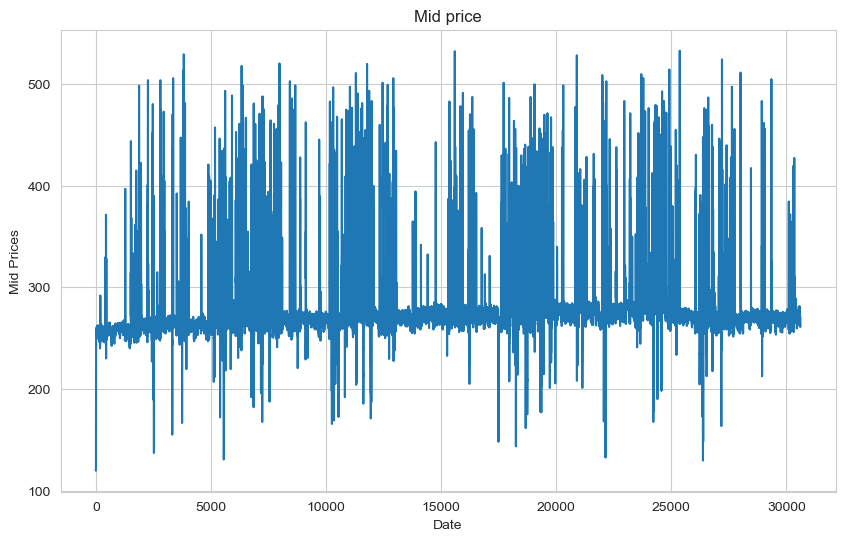

In [3]:
plt.figure(figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Mid Prices')
plt.plot(data_original['Mid_Price'])
plt.title('Mid price')
plt.show()

<Axes: ylabel='Density'>

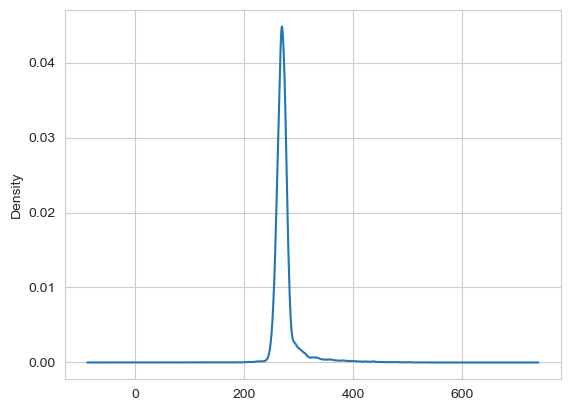

In [4]:
df_mid=data_original['Mid_Price']
df_mid.plot(kind='kde')

#### Check the stationarity

Using the ADF test to check if a series is stationary or not because time series analysis only works with stationary data

In [5]:
def test_stationarity(timeseries):
    print("Results for dickey fuller test")
    results=adfuller(timeseries, autolag='AIC')
    output=pd.Series(results[0:4], index=['Test Statistics', 'p-value', 'No. of lags used', 'Number of observations used'])
    for key, values in results[4].items():
        output['critical value (%s)'%key] =values
    print(output)

In [6]:
from sklearn.preprocessing import MinMaxScaler
df_mid=df_mid.dropna()
df_mid=np.log(df_mid)
# from scipy.stats import zscore
# df=df_mid.apply(zscore)
# scaler=MinMaxScaler()
# data=df_mid.reshape(-1,1)
# df_mid=scaler.fit_transform(df_mid)
test_stationarity(df_mid)

Results for dickey fuller test
Test Statistics                   -38.167513
p-value                             0.000000
No. of lags used                   92.000000
Number of observations used    333502.000000
critical value (1%)                -3.430370
critical value (5%)                -2.861549
critical value (10%)               -2.566775
dtype: float64


Stationary

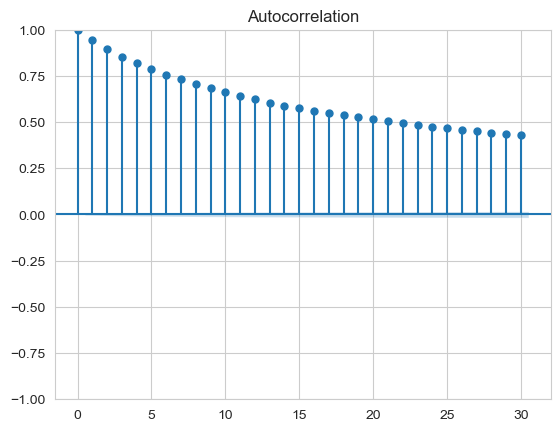

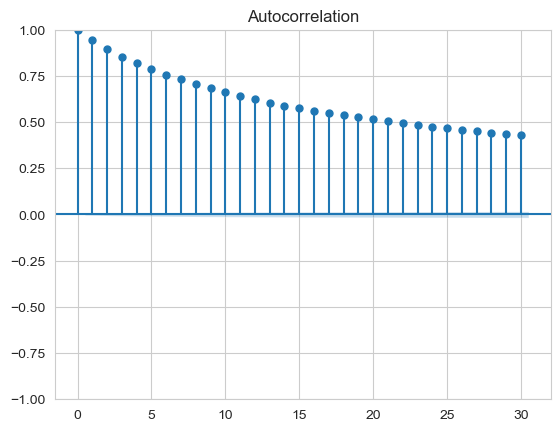

In [7]:
n_lags=30
plot_acf(df_mid,lags=n_lags)

/Users/yujiewang/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


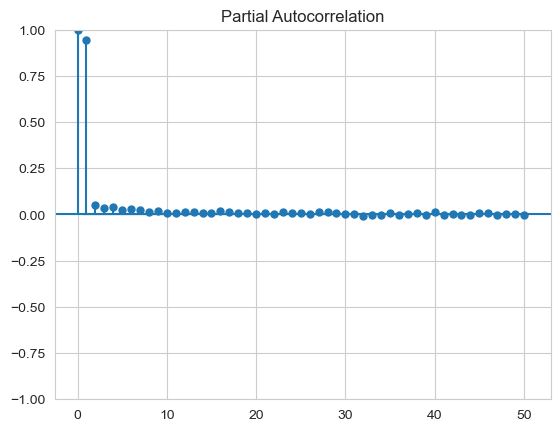

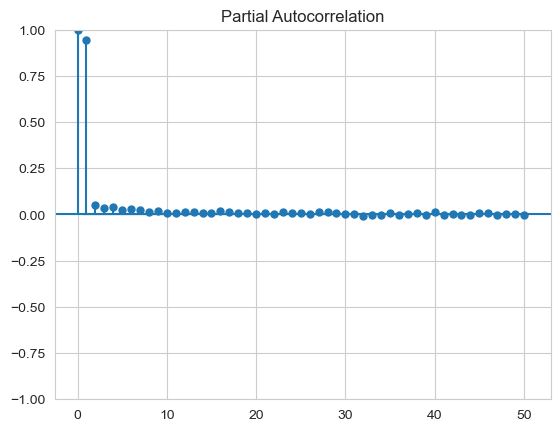

In [8]:
plot_pacf(df_mid,lags=n_lags+20)

In [9]:
def train_test_split(df,size=0.9):
    end=int(len(df)*size)
    print(end)
    train_data=df.iloc[:end]
    test_data =df.iloc[end:]
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.xlabel('Dates')
    plt.ylabel('Mid Prices')
    plt.plot(df,'green', label='Train data')
    plt.plot(test_data, 'blue', label='Test data')
    plt.legend()
    return train_data, test_data

Index([    0.093,      1.24,     2.542,     2.666,     2.728,      3.72,
           3.937,     4.247,     4.681,     5.611,
       ...
       30599.232, 30599.294, 30599.356,  30599.48, 30599.573, 30599.604,
       30599.666, 30599.697, 30599.728, 30599.945],
      dtype='float64', name='Time', length=333595)
233516


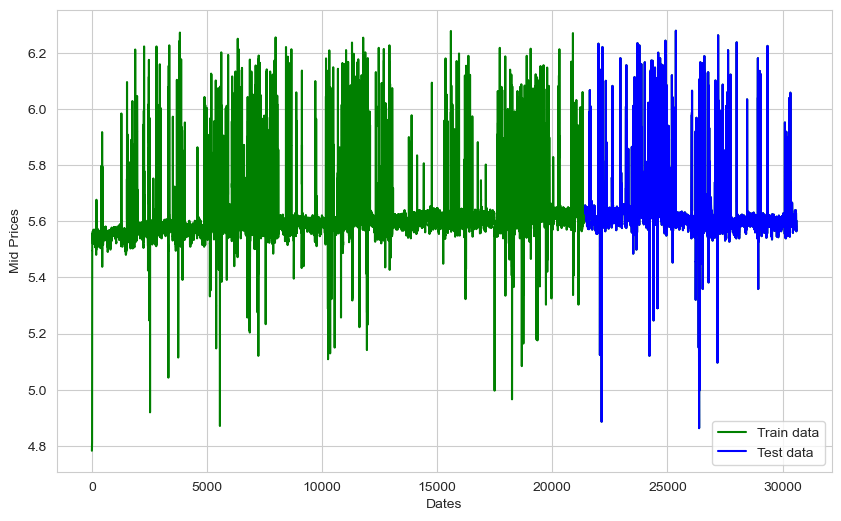

In [10]:
print(df_mid.index)
train_data,test_data=train_test_split(df_mid, 0.7)

/Users/yujiewang/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yujiewang/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yujiewang/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yujiewang/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yujiewang/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was

AIC for ARIMA(2,1,2):-1045581.5383526149
AIC for ARIMA(2,1,3):-1045549.1453092261
AIC for ARIMA(2,1,4):-1045760.0760855441
AIC for ARIMA(3,1,2):-1045733.8824081123
AIC for ARIMA(3,1,3):-1045691.7806590097
AIC for ARIMA(3,1,4):-1045727.2395939955


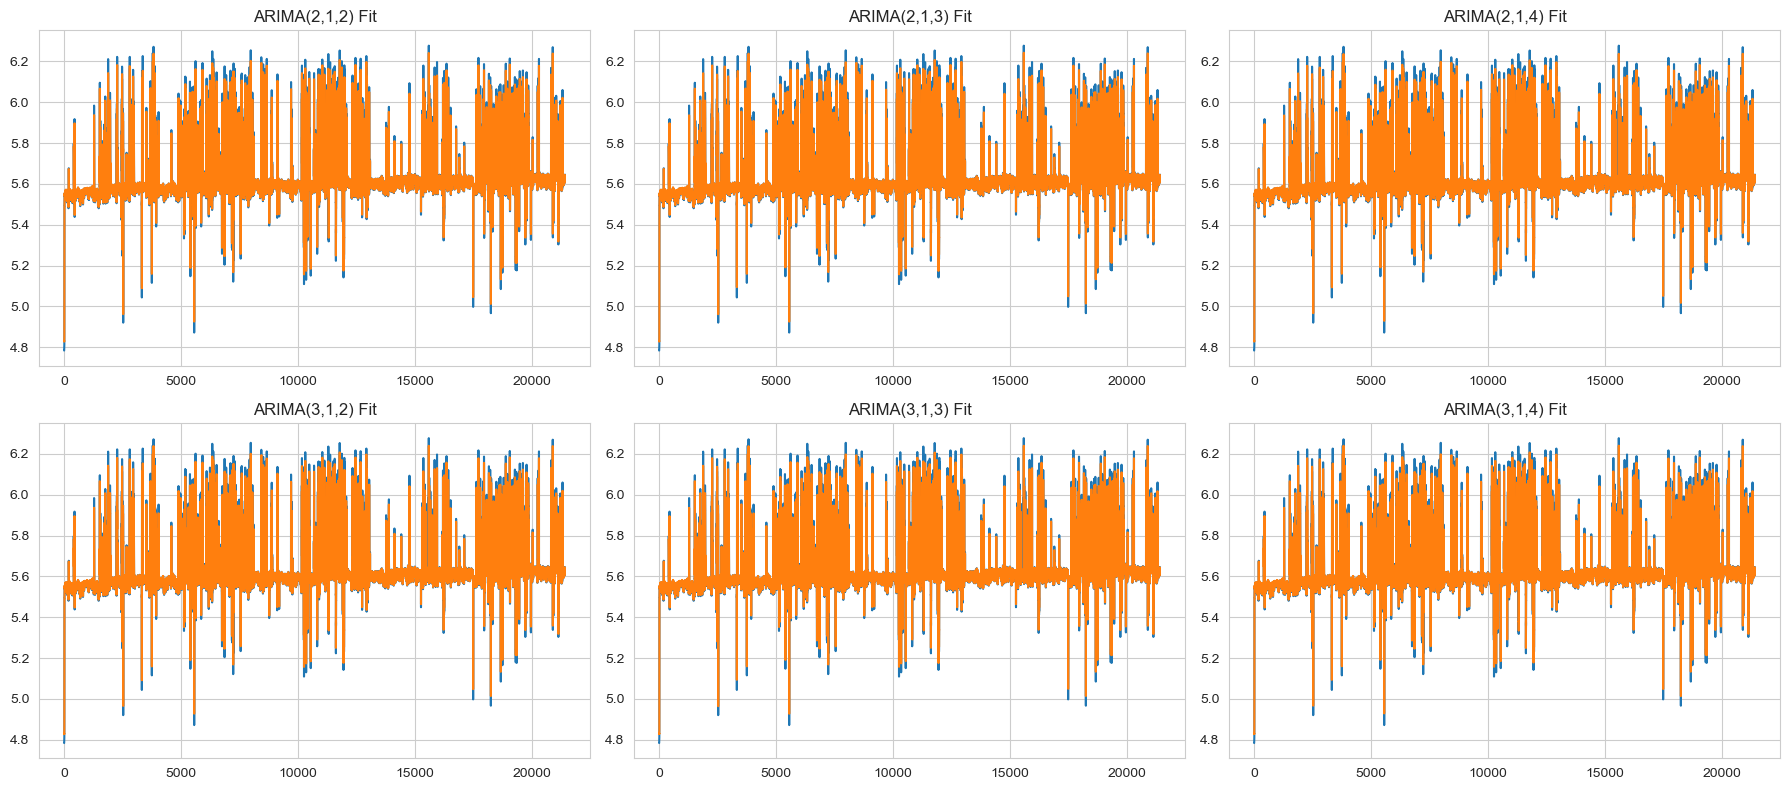

In [11]:
# model selection
ar_orders=[2,3]
ma_orders=[2,3,4]
fitted_model_dict={}
AIC_dict={}
fig,axes=plt.subplots(len(ar_orders),len(ma_orders),figsize=(18,8))
for idx, ar_order in enumerate(ar_orders):
    for idy, ma_order in enumerate(ma_orders):
        # create ARIMA model
        model=ARIMA(train_data, order=(ar_order,0,ma_order))
        model_fit = model.fit()
        fitted_model_dict[ar_order,ma_order]=model_fit
        AIC_dict[ar_order,ma_order]=fitted_model_dict[ar_order,ma_order].aic
        ax = axes[idx, idy]
        ax.set_title('ARIMA(%s,1,%s) Fit'%(ar_order,ma_order))
        ax.plot(train_data)
        ax.plot(model_fit.fittedvalues[1:])
plt.tight_layout()
for ar_order in ar_orders:
    for ma_order in ma_orders:
        print('AIC for ARIMA(%s,1,%s):%s'%(ar_order,ma_order,AIC_dict[ar_order,ma_order]))

In [12]:
# Sort the dictionary by value and return the first key-value pair
min_key, min_val = sorted(AIC_dict.items(), key=lambda x: x[1])[0]
print("The ARIMA model with the lowest AIC is: (%s,1,%s)"%(min_key[0],min_key[1]))

The ARIMA model with the lowest AIC is: (2,1,4)


Figure(1500x800)


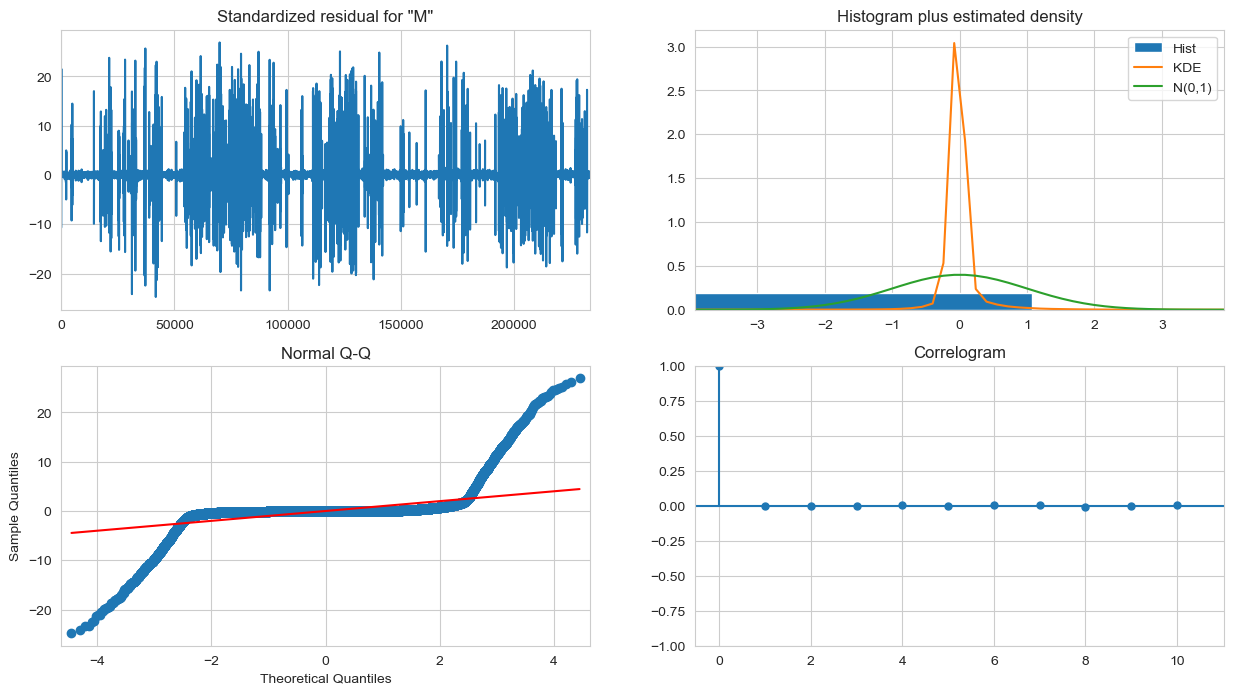

In [13]:
print(fitted_model_dict[min_key[0],min_key[1]].plot_diagnostics(figsize=(15,8)))

Time
0.093        4.783316
1.240        4.783316
2.542        4.787492
2.666        4.787492
2.728        4.791650
               ...   
21415.110    5.645447
21415.265    5.645447
21415.420    5.645447
21415.637    5.645447
21415.885    5.643679
Name: Mid_Price, Length: 233516, dtype: float64
Time
0.093        5.608076
1.240        4.830648
2.542        4.828173
2.666        4.830147
2.728        4.828534
               ...   
21415.110    5.643896
21415.265    5.643896
21415.420    5.643897
21415.637    5.643897
21415.885    5.643897
Length: 233516, dtype: float64


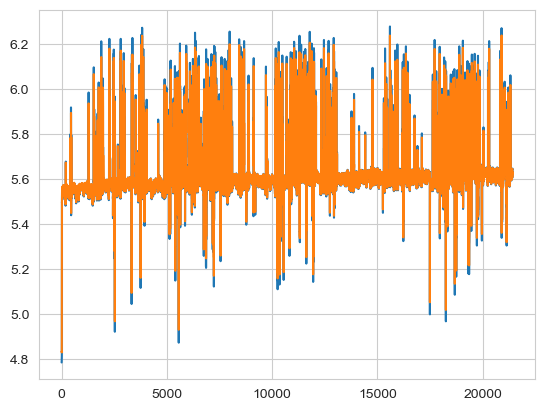

In [14]:
model_fit=fitted_model_dict[min_key[0],min_key[1]]
#model_fit=fitted_model_dict[3,2]
#get the predictions and residuals
predictions=model_fit.fittedvalues
# residuals = test_data - predictions
print(train_data)
print(predictions)
plt.plot(train_data)
plt.plot(predictions[1:])

In [15]:
pre_test=model_fit.forecast(steps=len(test_data))
# lower_series = pd.Series(conf[:, 0], index=test_data.index)
# upper_series = pd.Series(conf[:, 1], index=test_data.index)
print(pre_test)

/Users/yujiewang/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


233516    5.642331
233517    5.641110
233518    5.640001
233519    5.638979
233520    5.638027
            ...   
333590    5.608076
333591    5.608076
333592    5.608076
333593    5.608076
333594    5.608076
Name: predicted_mean, Length: 100079, dtype: float64


In [16]:
fc_series = pd.Series(np.array(pre_test), index=test_data.index)
fc_series

Time
21415.916    5.642331
21415.978    5.641110
21416.009    5.640001
21416.071    5.638979
21416.102    5.638027
               ...   
30599.604    5.608076
30599.666    5.608076
30599.697    5.608076
30599.728    5.608076
30599.945    5.608076
Length: 100079, dtype: float64

<Axes: xlabel='Time'>

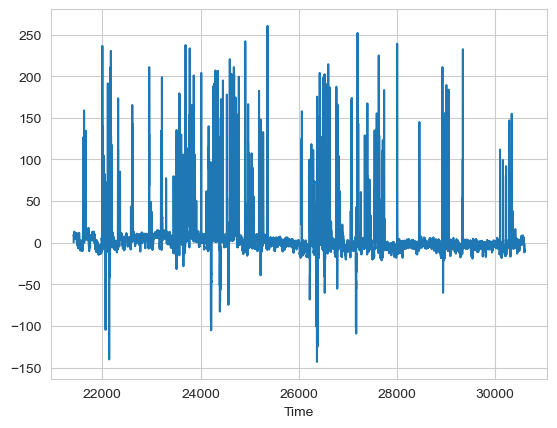

In [21]:
residuals=np.exp(test_data)-np.exp(fc_series)
residuals.plot()

MAE:10.082820340252587
RMSE: 22.601389256135
MAPE: 0.03320873522008251


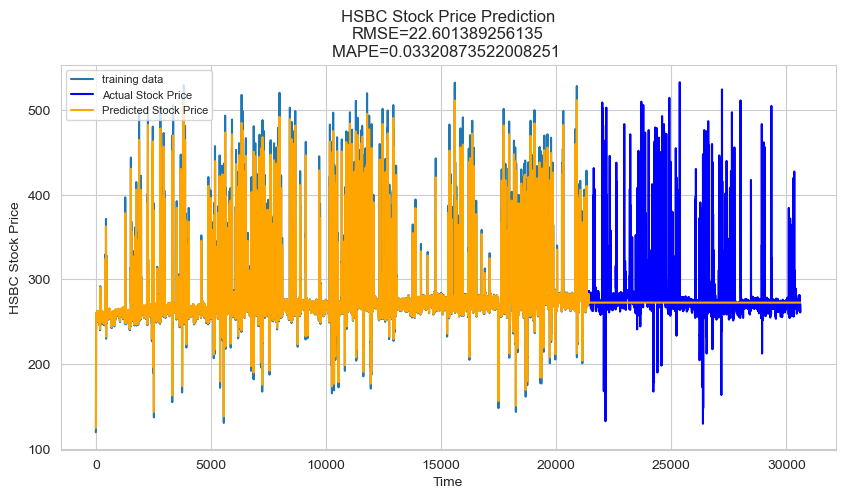

In [22]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
concat_df=[predictions[1:],fc_series]
pred_df=pd.concat(concat_df)
plt.figure(figsize=(10,5), dpi=100)
plt.plot(np.exp(train_data), label='training data')
plt.plot(np.exp(test_data), color = 'blue', label='Actual Stock Price')
plt.plot(np.exp(pred_df), color = 'orange',label='Predicted Stock Price')
#plt.fillbetween(test_data.index, lower_series, upper_series, color='k', alpha=.15)
print('MAE:'+str(mean_absolute_error(np.exp(test_data),np.exp(fc_series))))
rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc_series)))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(residuals)/np.abs(np.exp(test_data)))
print('MAPE: '+str(mape))
plt.title('HSBC Stock Price Prediction\nRMSE=%s\nMAPE=%s '%(str(rmse),str(mape)))
plt.xlabel('Time')
plt.ylabel('HSBC Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()